<a href="https://colab.research.google.com/github/CharleneLimKH/python-mini-projects/blob/main/Using%20KNN_Copy_of_imputation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
from google.colab import files
  
  
uploaded = files.upload()

Saving heart_missing.csv to heart_missing (5).csv


In [61]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
imputer.fit(df)
X=imputer.transform(df)
col=df.columns
X_df=pd.DataFrame(X, columns = col)
X_df.describe()


NameError: ignored

In [ ]:
imputer = KNNImputer(n_neighbors=2)
df = pd.DataFrame(imputer.fit_transform(df), columns = df.columns)



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  target    303 non-null    float64
dtypes: float64(14)
memory usage: 33.3 KB


In [ ]:
################## Impute data using current method #####################
df.info() # OR df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      302 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   302 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [ ]:
df2 = df.fillna(df.median()) #OR df.fillna(df.mean(), inplace=True), if use inplace, it will overwrite

In [ ]:
#df["thalach"].compare(df_replaced["thalach"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      302 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   302 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [ ]:
df["thalach"].compare(df2["thalach"]) #to find which row is imputated

,self,other
71,NaN,152.5


In [ ]:
#understand features 


#age - in years
#sex - (1 = male; 0 = female)
#cp - chest pain type
#trestbps - resting blood pressure (in mm Hg on admission to the hospital)
#chol - serum cholestoral in mg/dl
#fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
#restecg - resting electrocardiographic results
#thalach - maximum heart rate achieved
#exang - exercise induced angina (1 = yes; 0 = no)
#oldpeak - ST depression induced by exercise relative to rest
#slope - the slope of the peak exercise ST segment
#ca - number of major vessels (0-3) colored by flourosopy
#thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
#target - 1 or 0

In [53]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns

#First we split the dataset into train and test
from sklearn.model_selection import train_test_split 
data=pd.read_csv('heart_missing.csv')
data.head()

y=data.target
x=data.drop('target', axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42) #why 42? e number is agreed by general 
x_train.shape,x_test.shape,y_train.shape,y_test.shape
#x_train.describe()

((212, 13), (91, 13), (212,), (91,))

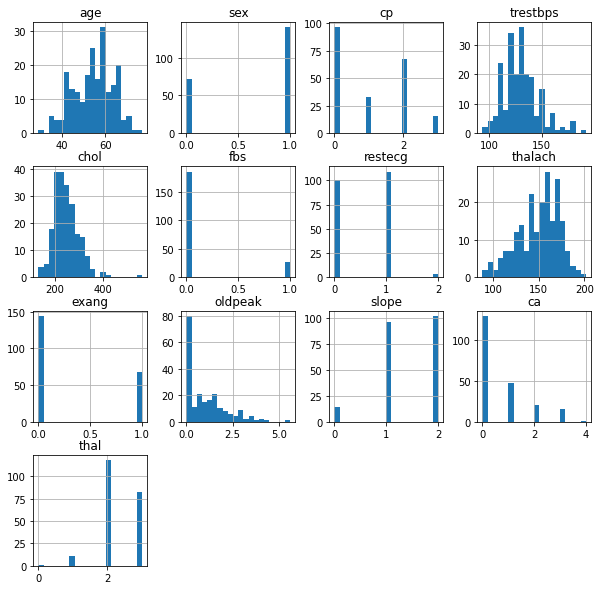

In [48]:
#Plot histograms of the data in 20 bins and figure size of figsize=(10,10)
plt = x_train.hist(figsize=(10,10),bins=20)
#plt.show()

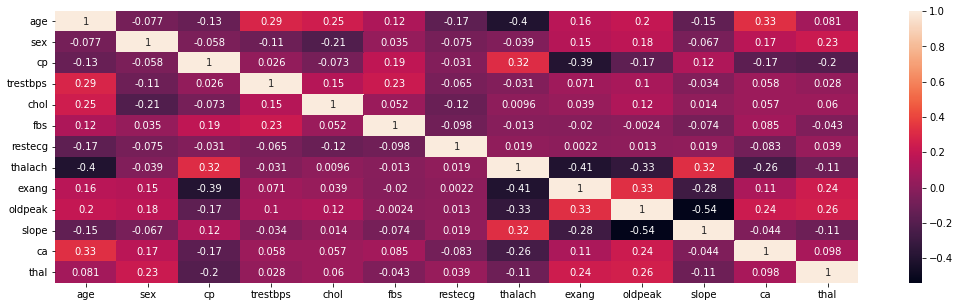

In [57]:
# Create figure 
plt.figure(figsize=(18,5))
# Use sns (seaborn) to create a heat map feed it with the corrolation of the data (computed by pandas using the function corr())
dataplot=sns.heatmap(x_train.corr(),annot=True)

#In plot we can see there is higher correlation between target and cp (chest pain) ,target and thalach (heart rate)
#some attributes are independent to each other also as there is near 0 correlation

In [60]:
#Random Forest Classifier
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.ensemble import RandomForestClassifier

y=data.target
x=data.drop('target', axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)  
x_train.shape,x_test.shape,y_train.shape,y_test.shape

clf= RandomForestClassifier(n_estimators=50)
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
print("Accuracy score {}".format(accuracy_score(y_test,y_pred)))


ValueError: ignored